# Machine Learning Workflow Digits

Based on working our way through the Machine Learning Workflow Iris notebook this notebook focuses on
providing some exercise for establishing a machine learning workflow.

1. Dataset Curation
2. Dataset Pre-processing
3. Dataset Provision
4. Training Configuration
5. Model Training Run
6. Evaluation
7. Iterative Optimisation

You can read more a bit more on the dataset here: http://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits




# [Step 2] Dataset Pre-Processing

The easiest way to load the Digits dataset is to use the built-in functionality of sci-kit learn.

You can load the IRIS dataset with the following commmands:

``from sklearn import datasets
iris = datasets.load_digits()
``

However, to practice the initial steps of the machine learning workflow we will 



## Exercise Downloading the Data

The data for the Digits dataset can be downloaded from.

http://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/
 

On a Linux or Mac OS machine you can use the following commands to download the files to a local directory.


In [90]:
# wget is a handy command line utility that allows downloading the specified URL
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra

--2023-10-24 18:46:58--  https://archive.ics.uci.edu/ml/machine-learning-databases/pendigits/pendigits.tra
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... 

connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘pendigits.tra.8’

pendigits.tra.8         [   <=>              ] 490,33K   655KB/s    in 0,7s    

2023-10-24 18:47:00 (655 KB/s) - ‘pendigits.tra.8’ saved [502098]



## Exercise: Inspecting the  Digits Dataset Format

Using the command line (or a text editor) we can inspect that dataset.

The `!` operator will allow you to execute command line commands from a Jupyter cell. 
This should work on all supported operating systems (Mac OS, Linux, Windows).

On a mac or linux machine you can make use of the following command line commands:

* `head` : Show top n lines of a text file
* `tail` : Show last n lines of a text file
* `cat`  : Print full content of a text file
* `wc -l`: Count number of lines of a text file

On a Windows machine the following should work:

* `more` : Show content of a text file (might hang in Jupyter)
* `type` : Print content of a text file 

In [91]:
# head and tail are other useful command line utilities on a linux machine that allow us to see the first n or last 
# n lines of a text file.

# Take your time to inspect both files with the head and tail commands. If you know that a file is not too long you can
# also make use of the cat command that prints an entire files contents. For large files this is not advised as it can 
# easily overpower the javascript based rendering on the browser.
!head pendigits.tra

 47,100, 27, 81, 57, 37, 26,  0,  0, 23, 56, 53,100, 90, 40, 98, 8
  0, 89, 27,100, 42, 75, 29, 45, 15, 15, 37,  0, 69,  2,100,  6, 2
  0, 57, 31, 68, 72, 90,100,100, 76, 75, 50, 51, 28, 25, 16,  0, 1
  0,100,  7, 92,  5, 68, 19, 45, 86, 34,100, 45, 74, 23, 67,  0, 4
  0, 67, 49, 83,100,100, 81, 80, 60, 60, 40, 40, 33, 20, 47,  0, 1
100,100, 88, 99, 49, 74, 17, 47,  0, 16, 37,  0, 73, 16, 20, 20, 6
  0,100,  3, 72, 26, 35, 85, 35,100, 71, 73, 97, 65, 49, 66,  0, 4
  0, 39,  2, 62, 11,  5, 63,  0,100, 43, 89, 99, 36,100,  0, 57, 0
 13, 89, 12, 50, 72, 38, 56,  0,  4, 17,  0, 61, 32, 94,100,100, 5
 57,100, 22, 72,  0, 31, 25,  0, 75, 13,100, 50, 75, 87, 26, 85, 0


# [Step 3] Provision: Loading the Dataset into a Dataframe|

### Exercise: Load the Digits CSV files with pandas

Lets create the test and train portions from the beginning based on the structure of the digits dataset.

In [92]:
# You can use the head() method in order to inspect the loaded dataframe.
# Your result should look exactly like shown below.
# If your result looks different then please have a look at the documentation of the parameters of the read_csv method 
# and load the data again. 

import pandas as pd

df = pd.read_csv('pendigits.tra', header=None)
df.head()
# Written nums from 0-9 with their pixel representation
df[16].unique()

array([8, 2, 1, 4, 6, 0, 5, 9, 7, 3])

***Exercise***: Inspect the dataframes with the shape, ndim and len() attributes and methods.

In [93]:
# Inspect the digits dataframes you have created for test and train
df_shuffled = df.sample(frac=1.0)

size_training_set = int(len(df) * 0.8)
df_train = df_shuffled[:size_training_set]
df_test = df_shuffled[size_training_set:]

df_train_input = df_train.loc[:, 0:15]
df_train_output = df_train[[16]]

df_test_input = df_test.loc[:, 0:15]
df_test_output = df_test[[16]]

# Alternetaviely we can use scikit-learn to do this for us
from sklearn.model_selection import train_test_split
X = df[df.columns[:-1]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

***Exercise: Create the Input and Response Dataframes for Test and Train Portions***

Use the tooling we introduced before in order to inspect your newly created dataframes. 

* `head()`
* `shape`
* `dim`
* `len()`


In [94]:
# Inspect your dataframes with the above tools in order to get familiar with them
# Inspecting the intermediary artifacts in the machine learning workflow is a common and crucial task.
# It is easy to imagine how one can be off when sub-setting or slicing through the input data by making a mistake. 
# These kind of errors are usually disastrous in terms of the outcome of the trained model. The earlier we catch them
# the less expensive they are to fix.

df_train_input.head()
# df_train_input.shape
# df_train_input.ndim
# len(df_train_input)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
7232,21,69,0,48,19,7,61,0,94,30,100,74,67,100,29,83
5973,79,70,18,71,38,100,72,80,85,48,100,16,57,0,0,15
1535,0,69,23,83,82,100,100,95,86,70,75,44,62,19,64,0
3071,17,99,39,72,94,42,65,0,16,25,0,74,27,100,100,99
5264,49,72,99,97,100,100,81,60,66,20,0,0,9,3,99,8


# [Step 4] Training Configuration

The next step consist of creating the configuration for the training. 

The main dependencies for choosing a training set up are:

* The data used for training (data type, quality, amount)
* The task we want to solve (what we want the machine learning system to achieve)

Based on these two aspects designing the training set up consists of the following steps:

1. Choose training algorithm
2. Create initial configuration for training algorithm

## Criteria for Choosing A ML Algorithm

Some main criteria for choosing a training algorithm are the following:

* Task Fit : I.e. can the task we want to solve with ML be solved with the given algorithm
* Scalability: How scalable in terms of the shape (columns, rows) of the input data is the algorithm 
    * The amount of features has a major impact on the scalability of algorithms
    * The amount of samples (rows) has a major impact on the execution time of the algorithm
* Expected Performance: What is the expected accuracy of the algorithm.
* Interpretability: How easy, hard is it to understand what is happening in the algorithm. How hard would it be to 'debug' the behaviour of the algorithm.
* Updatable Learning: Can the learned model be updated with more data at a later stage.
* Availability: In the pragmatic sense; is a trusty implementation of the algorithm available (also from a license perspective).
* Solution requirements: Do we have requirements from the software solution side. Maximum latency, memory limitations, etc ... . 

As the above list highlights, choosing the 'right' algorithm is a complex tasks with many potential considerations.
On the flip side it means that making the right choices has massive potential value. 

## Choosing an Initial Configuration

The choice of an initial training configuration often depends mainly on:

* Stats of the training data 
     * Hyperparameters often allow us to adjust the training to the amount of the training data
* Experience or documented well working configurations 
     * This is often based on identifying `baselines` that worked well on data that we deem similar to our training data.
     

## ML Task

By now it should be pretty clear what task fits well with the detection of hand-written digit images.

## Exercise: Choose Classification Algorithm

For this ML task we can consider a variety of classifiers available in sci-kit learn:

* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
* https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

The above listing represent some very widely used main classes of classifiers.
To proceed choose any of the above classifiers and instantiate it. 



In [95]:
# Exercise: Set up the logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.mixture import GaussianMixture

# Precision 0.9582985821517932, max_iter=10000 precision goes to 0.972977481234362
# classifier = LogisticRegression(max_iter=10000)

# Precision 1.0
# classifier = DecisionTreeClassifier()

# Precision 0.8353628023352794
# classifier = MultinomialNB()

# Precision 1.0
classifier = RandomForestClassifier()

# Precision -68.98149497142781
# classifier = GaussianMixture()

# [Step 5] Model Training Run - Establishing a Baseline

Algorithms in scikit-learn can be trained by using the `fit` method. Calling it `fit` is based on the process of `fitting` the model's weights (also called model parameters) during training.
`Fitting` means that the weights of the model are adjusted during the training (a.k.a learning) phase based on the input data we have seen.



## Exercise: Establishing a Baseline

Based on the choosen classifier and the test and train data, lets establish a first baseline for the digits dataset.

In [96]:
trained_model = classifier.fit(df_train_input, df_train_output.values.ravel())

### Testing your trained model

As before, use the `predict()` method of the trained model and test the classification by passing in new arrays or slicing part of the test data.

In [97]:
from sklearn.model_selection import train_test_split

prediction = trained_model.predict(
    df_test_input,
)
print(prediction)

[1 5 7 ... 9 3 7]


## [Step 6] Evaluation

All machine learning models provide a default metric that can be accessed via the score method. 

Record your first baseline by using the score method.

In [98]:
trained_model.score(df_train_input, df_train_output)

1.0

### Exercise: Confusion Matrix

The following code allows us to instantiate and plot a confusion matrix.

    import matplotlib.pyplot as plt
    import seaborn as sns; sns.set()
    from sklearn.metrics import confusion_matrix

    mat = confusion_matrix(array_expected_responses, trained_model.predict(test_input))

    sns.heatmap(mat, square=True, annot=True, cbar=False)
    plt.xlabel('predicted value')
    plt.ylabel('true value');



A confusion matrix is a very handy tool to identify where the classifier is likely to make errors.

The True Positive (correct decisions) are always depicted on the diagonal of the confusion matrix.
If the axis are labeled like in the example configuration below it is easy to identify the errors the model makes.

Adapt the above code to create a confusion matrix for your classifier. 
Evaluate the result of different classifiers.

* Do different classifiers make different kinds of mistakes?
* Can we identify any patterns in the behaviour of classifiers?
* Using the oonfusion matrix to identify the different classifiers should give you a feeling for its usefulness. A score is only a number and does not provide much else. The confusion matrix allows us to develop more insights with regard to the actual behaviour of a trained model.


Text(94.75, 0.5, 'true value')

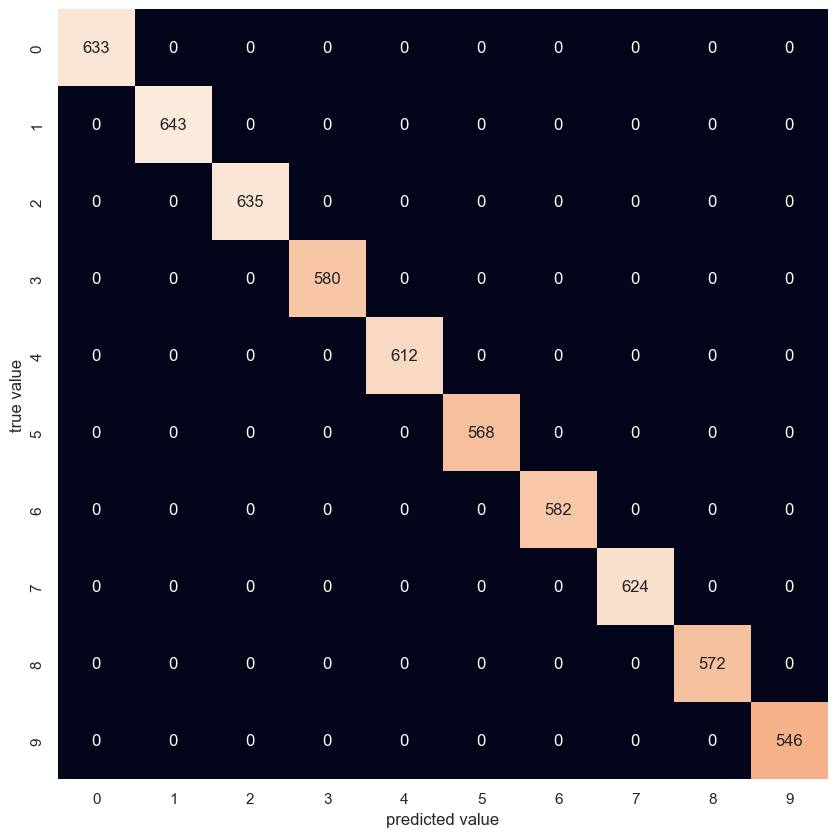

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(df_train_output, trained_model.predict(df_train_input))
plt.subplots(figsize=(10,10))
sns.heatmap(mat, square=True, annot=True, cbar=False, fmt="1")
plt.xlabel('predicted value')
plt.ylabel('true value')


### Exercise: Cross-Validation

As we learnt before it is common practice to operate based on a split of test and train data. 

Testing with unseen data is more realistic than executing the test with data that has already been processed by the trained model. 

However, we have also seen that the actual split (i.e. which samples end up in train and which in test) can have quite a significant impact on the observed performance.

In order to mitigate this effect the method of cross-validation has been invented.
Cross-validation simply means that I attempt to split my data `n` times into test and train portions and then run and evaluate my model `n` times with these different splits.

One generally speaks of n-fold cross-validation. That means, if we speak of 10-fold cross-validation we will split the data randomly 10 times into a test and train portion, run the training 10 times on these splits, and evaluate 10 times.

The main goal is to evaluate outliers in terms of exceptionally good or bad performance that are mainly caused by generating a 'lucky' or 'bad' split of the data.

Even though you are using cross-validation we should hold out a dedicated test set.

The following link provides instructions of how to apply cross-validation:

https://scikit-learn.org/stable/modules/cross_validation.html#computing-cross-validated-metrics

Please configure cross-validation and run evaluations on a couple of the classifiers with it.

What are some limiting factors for applying cross-validation?

In [108]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier, df_train_input, df_train_output.values.ravel(), cv=100)
print(scores)
print("---")
print(f"{scores.mean()} accuracy with a standard deviation of {scores.std()}")

[0.98333333 1.         0.98333333 1.         1.         1.
 1.         0.96666667 1.         1.         1.         0.98333333
 0.98333333 1.         1.         0.98333333 0.98333333 1.
 1.         1.         1.         0.98333333 1.         1.
 1.         0.98333333 0.98333333 1.         1.         0.95
 0.98333333 1.         1.         1.         1.         1.
 0.96666667 0.96666667 1.         1.         1.         0.98333333
 0.98333333 0.98333333 0.98333333 1.         1.         0.98333333
 1.         0.98333333 1.         1.         1.         1.
 1.         0.95       0.98333333 0.98333333 0.96666667 1.
 1.         0.98333333 0.98333333 1.         0.98333333 0.98333333
 1.         1.         0.98333333 0.98333333 1.         1.
 0.98333333 0.98333333 0.98333333 1.         1.         1.
 1.         0.98333333 1.         1.         0.98333333 1.
 1.         0.98333333 0.98333333 1.         1.         0.96666667
 0.96666667 1.         1.         0.98333333 1.         0.98305085
 1.   